# Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import optuna

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Preprocessing & EDA

In [4]:
fifa_ranking = pd.read_csv('~/DS_bootcamp/stavki/data/ranking/fifa_ranking-2022-10-06.csv')
fifa_ranking['rank_date'] = pd.to_datetime(fifa_ranking.rank_date)
fifa_ranking.index = fifa_ranking['rank_date']

In [5]:
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Brunei'), 'country_full'] = 'Brunei'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Cabo'), 'country_full'] = 'Cape Verde'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Cape'), 'country_full'] = 'Cape Verde'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Curaçao'), 'country_full'] = 'Curacao'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Iran'), 'country_full'] = 'Iran'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Chinese Taipei'), 'country_full'] = 'China'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('China PR'), 'country_full'] = 'China'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Congo DR'), 'country_full'] = 'Congo'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Türkiye'), 'country_full'] = 'Turkey'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Tomé'), 'country_full'] = 'Sao Tome e Principe'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Korea Republic'), 'country_full'] = 'South Korea'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Korea DPR'), 'country_full'] = 'North Korea'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Kyrgyz Republic'), 'country_full'] = 'Kyrgyzstan'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Netherlands'), 'country_full'] = 'Netherlands'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Macedonia'), 'country_full'] = 'North Macedonia'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Zaire'), 'country_full'] = 'Congo'
fifa_ranking.loc[fifa_ranking.country_full.str.contains('Vincent / Grenadines'), 'country_full'] = 'Saint Vincent and the Grenadines'
fifa_ranking['country_full'] = fifa_ranking['country_full'].str.replace('St.', 'Saint', regex=True)

In [6]:
points = fifa_ranking.groupby([pd.Grouper(freq='Q'), 'country_full'])
points = points['total_points'].mean().unstack('country_full').fillna(0)
rank = fifa_ranking.groupby([pd.Grouper(freq='Q'), 'country_full'])
rank = rank['rank'].mean().unstack('country_full').fillna(0)

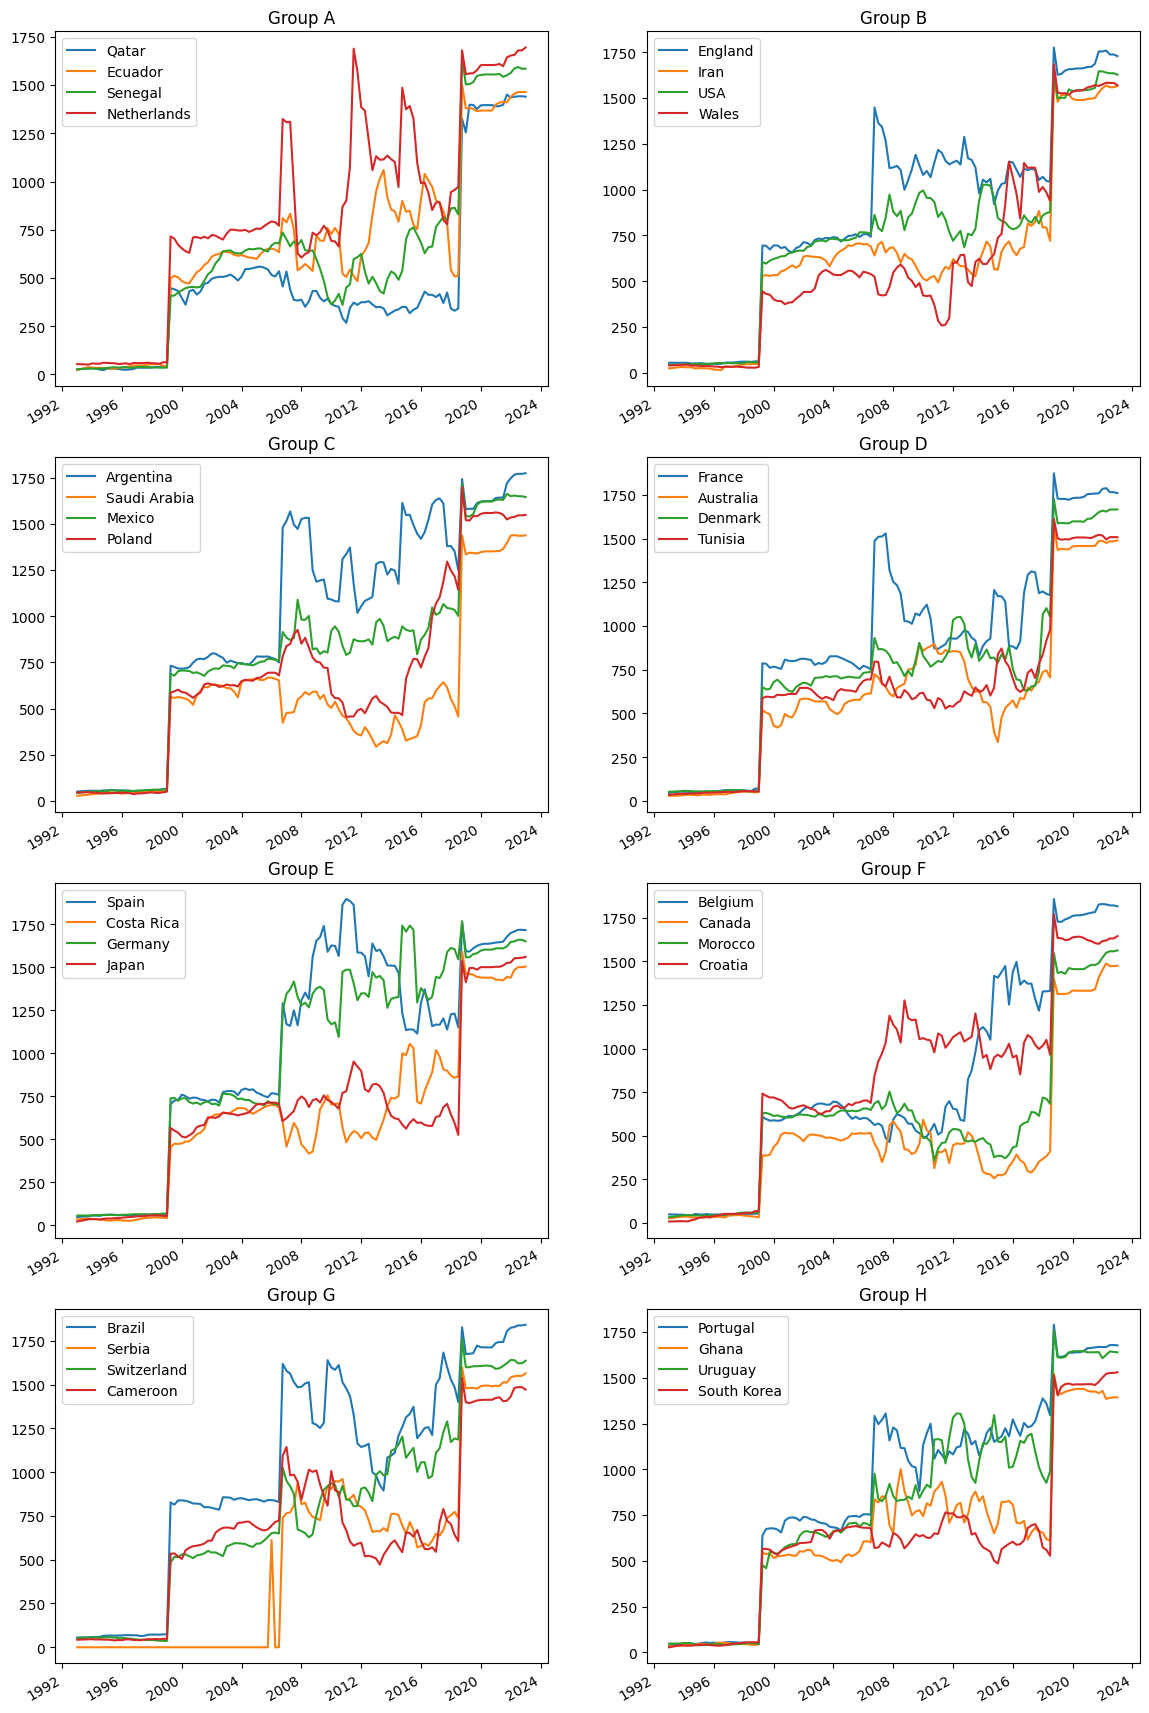

In [5]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(14,24))

points[['Qatar', 'Ecuador', 'Senegal', 'Netherlands']].plot(ax=ax1).set(title='Group A', xlabel='', ylabel='')
points[['England', 'Iran', 'USA', 'Wales']].plot(ax=ax2).set(title='Group B', xlabel='', ylabel='')
points[['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']].plot(ax=ax3).set(title='Group C', xlabel='', ylabel='')
points[['France', 'Australia', 'Denmark', 'Tunisia']].plot(ax=ax4).set(title='Group D', xlabel='', ylabel='')
points[['Spain', 'Costa Rica', 'Germany', 'Japan']].plot(ax=ax5).set(title='Group E', xlabel='', ylabel='')
points[['Belgium', 'Canada', 'Morocco', 'Croatia']].plot(ax=ax6).set(title='Group F', xlabel='', ylabel='')
points[['Brazil', 'Serbia', 'Switzerland', 'Cameroon']].plot(ax=ax7).set(title='Group G', xlabel='', ylabel='')
points[['Portugal', 'Ghana', 'Uruguay', 'South Korea']].plot(ax=ax8).set(title='Group H', xlabel='', ylabel='')

ax1.legend(['Qatar', 'Ecuador', 'Senegal', 'Netherlands'])
ax2.legend(['England', 'Iran', 'USA', 'Wales'])
ax3.legend(['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'])
ax4.legend(['France', 'Australia', 'Denmark', 'Tunisia'])
ax5.legend(['Spain', 'Costa Rica', 'Germany', 'Japan'])
ax6.legend(['Belgium', 'Canada', 'Morocco', 'Croatia'])
ax7.legend(['Brazil', 'Serbia', 'Switzerland', 'Cameroon'])
ax8.legend(['Portugal', 'Ghana', 'Uruguay', 'South Korea'])

plt.show()

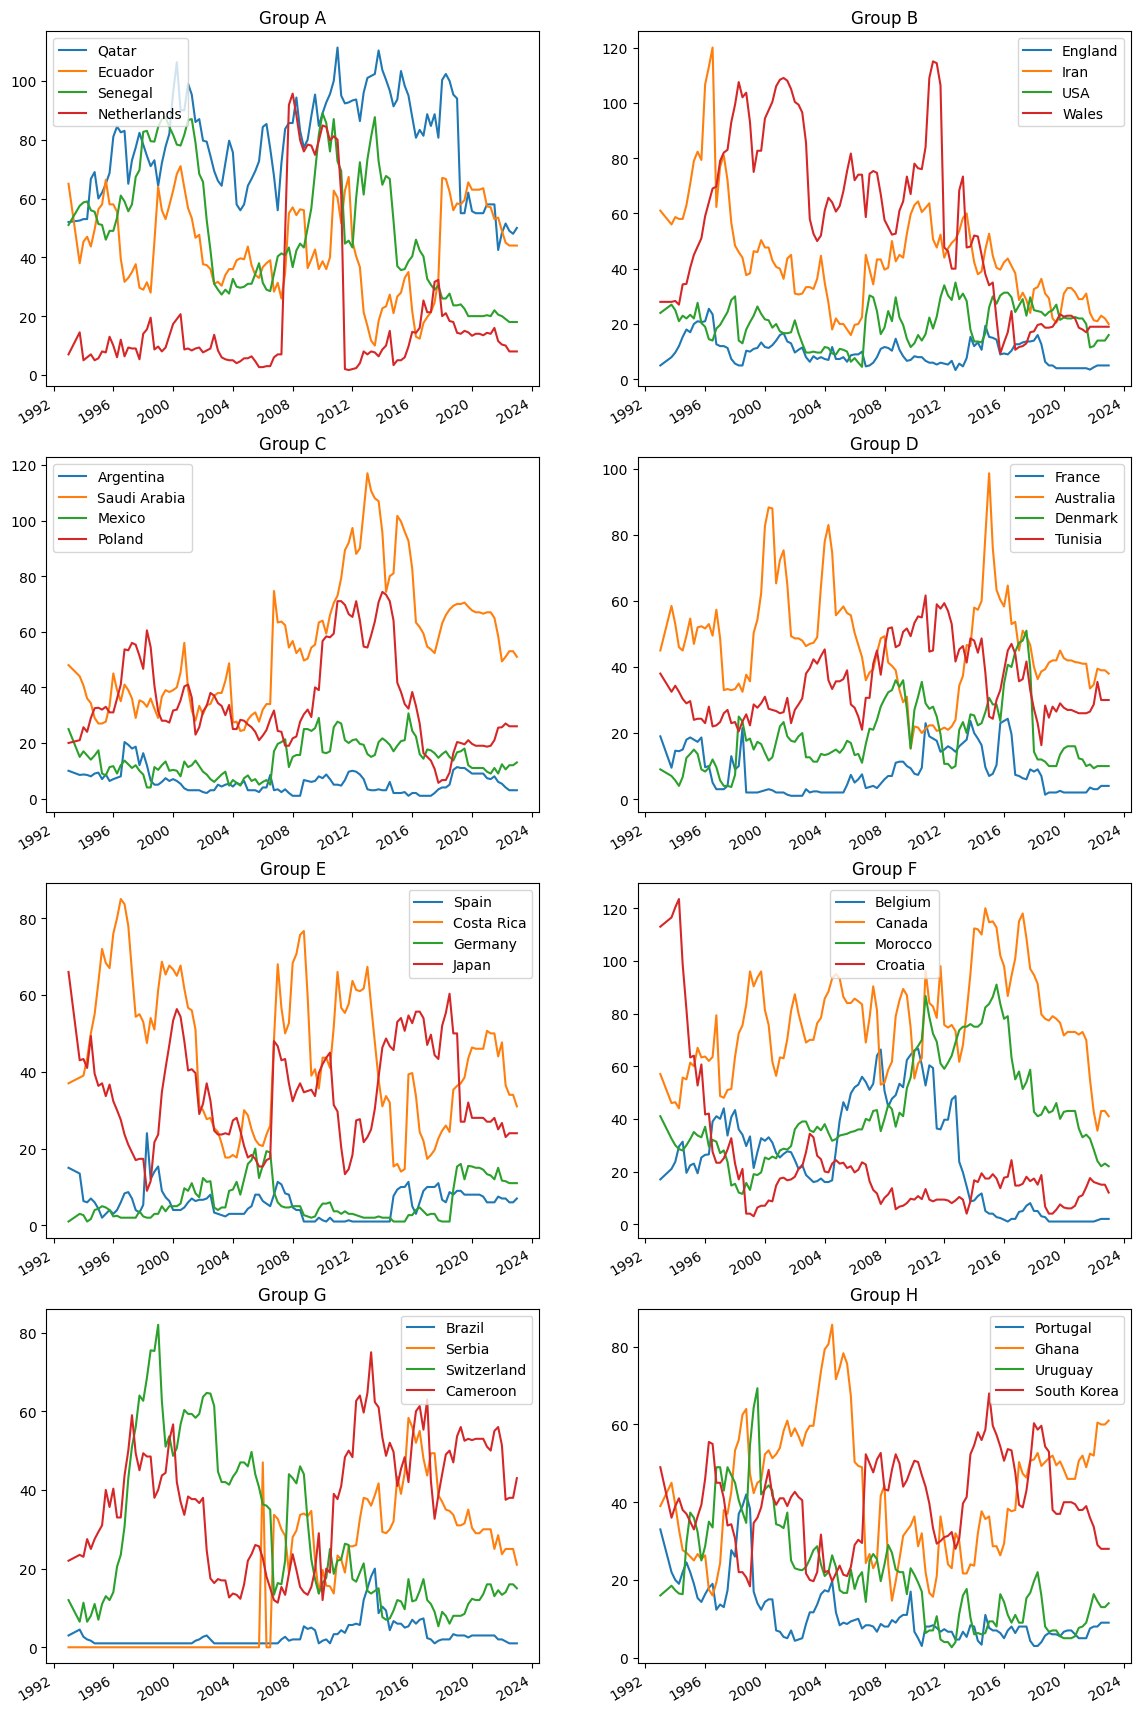

In [6]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4,2, figsize=(14,24))

rank[['Qatar', 'Ecuador', 'Senegal', 'Netherlands']].plot(ax=ax1).set(title='Group A', xlabel='', ylabel='')
rank[['England', 'Iran', 'USA', 'Wales']].plot(ax=ax2).set(title='Group B', xlabel='', ylabel='')
rank[['Argentina', 'Saudi Arabia', 'Mexico', 'Poland']].plot(ax=ax3).set(title='Group C', xlabel='', ylabel='')
rank[['France', 'Australia', 'Denmark', 'Tunisia']].plot(ax=ax4).set(title='Group D', xlabel='', ylabel='')
rank[['Spain', 'Costa Rica', 'Germany', 'Japan']].plot(ax=ax5).set(title='Group E', xlabel='', ylabel='')
rank[['Belgium', 'Canada', 'Morocco', 'Croatia']].plot(ax=ax6).set(title='Group F', xlabel='', ylabel='')
rank[['Brazil', 'Serbia', 'Switzerland', 'Cameroon']].plot(ax=ax7).set(title='Group G', xlabel='', ylabel='')
rank[['Portugal', 'Ghana', 'Uruguay', 'South Korea']].plot(ax=ax8).set(title='Group H', xlabel='', ylabel='')

ax1.legend(['Qatar', 'Ecuador', 'Senegal', 'Netherlands'])
ax2.legend(['England', 'Iran', 'USA', 'Wales'])
ax3.legend(['Argentina', 'Saudi Arabia', 'Mexico', 'Poland'])
ax4.legend(['France', 'Australia', 'Denmark', 'Tunisia'])
ax5.legend(['Spain', 'Costa Rica', 'Germany', 'Japan'])
ax6.legend(['Belgium', 'Canada', 'Morocco', 'Croatia'])
ax7.legend(['Brazil', 'Serbia', 'Switzerland', 'Cameroon'])
ax8.legend(['Portugal', 'Ghana', 'Uruguay', 'South Korea'])

plt.show()

In [7]:
points['date'] = points.index
rank['date'] = rank.index
points = pd.melt(points, id_vars='date', value_vars=points.columns[:-1])
rank = pd.melt(rank, id_vars='date', value_vars=rank.columns[:-1])
points.columns = ['date', 'country', 'points']
rank.columns = ['date', 'country', 'rank']
rating = points.merge(rank, on=['date', 'country'])

rating['date'] = pd.to_datetime(rating.date)
rating.index = rating['date']
rating = rating.drop('date', axis=1)

In [8]:
# shootouts
shootouts = pd.read_csv('~/DS_bootcamp/stavki/data/ranking/matches/shootouts.csv')
shootouts['date'] = pd.to_datetime(shootouts.date)
shootouts.index = shootouts['date']
shootouts.loc[shootouts.home_team==shootouts.winner, 'result_class'] = 'home'
shootouts.loc[shootouts.away_team==shootouts.winner, 'result_class'] = 'away'
shootouts = shootouts[['home_team', 'away_team', 'result_class']]
# matches
matches = pd.read_csv('~/DS_bootcamp/stavki/data/ranking/matches/results.csv')
matches['date'] = pd.to_datetime(matches.date)
matches.index = matches['date']
matches['result'] = matches.home_score - matches.away_score
matches.loc[matches.result==0, 'result_class'] = 'draw'
matches.loc[matches.result>0, 'result_class'] = 'home'
matches.loc[matches.result<0, 'result_class'] = 'away'
matches = matches[['home_team', 'away_team', 'result_class']]
# concat
matches = pd.concat([matches, shootouts])
matches = matches.dropna()

In [9]:
matches.loc[matches.home_team.str.contains('China'), 'home_team'] = 'China'
matches.loc[matches.away_team.str.contains('China'), 'away_team'] = 'China'
matches.loc[matches.home_team.str.contains('Curaçao'), 'home_team'] = 'Curacao'
matches.loc[matches.away_team.str.contains('Curaçao'), 'away_team'] = 'Curacao'
matches.loc[matches.home_team.str.contains('Congo'), 'home_team'] = 'Congo'
matches.loc[matches.away_team.str.contains('Congo'), 'away_team'] = 'Congo'
matches.loc[matches.home_team.str.contains('German'), 'home_team'] = 'Germany'
matches.loc[matches.away_team.str.contains('German'), 'away_team'] = 'Germany'
matches.loc[matches.home_team.str.contains('Yemen'), 'home_team'] = 'Yemen'
matches.loc[matches.away_team.str.contains('Yemen'), 'away_team'] = 'Yemen'
matches.loc[matches.home_team.str.contains('Vietnam'), 'home_team'] = 'Vietnam'
matches.loc[matches.away_team.str.contains('Vietnam'), 'away_team'] = 'Vietnam'
matches.loc[matches.home_team.str.contains('Sint Maarten'), 'home_team'] = 'Saint Martin'
matches.loc[matches.away_team.str.contains('Sint Maarten'), 'away_team'] = 'Saint Martin'
matches.loc[matches.home_team.str.contains('São Tomé and Príncipe'), 'home_team'] = 'Sao Tome e Principe'
matches.loc[matches.away_team.str.contains('São Tomé and Príncipe'), 'away_team'] = 'Sao Tome e Principe'
matches.home_team = matches.home_team.replace('United States Virgin Islands', 'US Virgin Islands')
matches.away_team = matches.away_team.replace('United States Virgin Islands', 'US Virgin Islands')
matches.home_team = matches.home_team.replace('United States', 'USA')
matches.away_team = matches.away_team.replace('United States', 'USA')

In [10]:
matches.index = matches.index.to_period('Q')
rating.index = rating.index.to_period('Q')
matches = matches.reset_index()
rating = rating.reset_index()
rating['home_team'] = rating.country
rating['away_team'] = rating.country
df = pd.merge(matches, rating.drop(['country', 'away_team'], axis=1), on=['home_team', 'date'])
df = pd.merge(df, rating.drop(['country', 'home_team'], axis=1), on=['away_team', 'date'])
df.columns = ['date', 'home_team', 'away_team', 'result_class', 
              'points_home', 'rank_home',
              'points_away', 'rank_away']
df.index = df.date
df = df.drop('date', axis=1)
df.tail()

,home_team,away_team,result_class,points_home,rank_home,points_away,rank_away
date,,,,,,,
2022Q3,Albania,Iceland,draw,1361.81,66.0,1379.61,63.0
2022Q3,Norway,Serbia,away,1488.57,36.0,1549.53,25.0
2022Q3,Sweden,Slovenia,draw,1563.44,20.0,1372.48,65.0
2022Q3,Kosovo,Cyprus,home,1183.90,106.0,1180.52,108.0
2022Q3,Greece,Northern Ireland,home,1441.45,49.0,1399.10,58.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24618 entries, 1992Q4 to 2022Q3
Freq: Q-DEC
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   home_team     24618 non-null  object 
 1   away_team     24618 non-null  object 
 2   result_class  24618 non-null  object 
 3   points_home   24618 non-null  float64
 4   rank_home     24618 non-null  float64
 5   points_away   24618 non-null  float64
 6   rank_away     24618 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.5+ MB


In [11]:
df = df.drop_duplicates()

In [12]:
data = df.copy()
data['points_difference'] = data.points_home-data.points_away
data['points_average'] = (data.points_home+data.points_away)/2
data['rank_difference'] = data.rank_home-data.rank_away
data['rank_average'] = (data.rank_home+data.rank_away)/2
data['date']=data.index.to_timestamp().year

data = data.drop(['home_team', 'away_team'], axis=1)
data

,result_class,points_home,rank_home,points_away,rank_away,points_difference,points_average,rank_difference,rank_average,date
date,,,,,,,,,,
1992Q4,draw,24.00,61.0,43.00,22.0,-19.00,33.500,39.0,41.5,1992
1992Q4,home,28.00,48.0,43.00,22.0,-15.00,35.500,26.0,35.0,1992
1992Q4,away,2.00,139.0,17.00,76.0,-15.00,9.500,63.0,107.5,1992
1992Q4,home,24.00,63.0,17.00,76.0,7.00,20.500,-13.0,69.5,1992
1992Q4,away,2.00,139.0,15.00,81.0,-13.00,8.500,58.0,110.0,1992
...,...,...,...,...,...,...,...,...,...,...
2022Q3,draw,1361.81,66.0,1379.61,63.0,-17.80,1370.710,3.0,64.5,2022
2022Q3,away,1488.57,36.0,1549.53,25.0,-60.96,1519.050,11.0,30.5,2022
2022Q3,draw,1563.44,20.0,1372.48,65.0,190.96,1467.960,-45.0,42.5,2022


# Modeling

In [13]:
X = data.drop('result_class', axis=1)
y = data['result_class']

In [14]:
scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
def objective(trial):
    param_grid = {
        'n_jobs': 10,
        'multi_class': 'multinomial',
        'fit_intercept': True,
        'solver': trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'sag', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000),
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
    }
    
    model = LogisticRegression(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_lr = optuna.create_study()
study_lr.optimize(objective, n_trials=20)

[I 2022-11-15 17:48:30,375] A new study created in memory with name: no-name-d304f322-4272-4c00-ac3e-5a562cc9bf52
[I 2022-11-15 17:48:30,583] Trial 0 finished with value: 0.5613168724279836 and parameters: {'solver': 'sag', 'max_iter': 716, 'warm_start': True}. Best is trial 0 with value: 0.5613168724279836.
[I 2022-11-15 17:48:31,866] Trial 1 finished with value: 0.5613168724279836 and parameters: {'solver': 'lbfgs', 'max_iter': 104, 'warm_start': False}. Best is trial 0 with value: 0.5613168724279836.
[I 2022-11-15 17:48:32,342] Trial 2 finished with value: 0.5613168724279836 and parameters: {'solver': 'lbfgs', 'max_iter': 624, 'warm_start': True}. Best is trial 0 with value: 0.5613168724279836.
[I 2022-11-15 17:48:32,921] Trial 3 finished with value: 0.5613168724279836 and parameters: {'solver': 'newton-cg', 'max_iter': 370, 'warm_start': False}. Best is trial 0 with value: 0.5613168724279836.
[I 2022-11-15 17:48:33,497] Trial 4 finished with value: 0.5613168724279836 and parameters

In [99]:
study_lr.best_params

{'solver': 'sag', 'max_iter': 716, 'warm_start': True}

In [86]:
lm = LogisticRegression(multi_class='multinomial', 
                        n_jobs=100, 
                        fit_intercept=True, 
                        **study_lr.best_params)

In [87]:
lm.fit(X_train, y_train)

LogisticRegression(max_iter=716, multi_class='multinomial', n_jobs=100,
                   solver='sag', warm_start=True)

In [88]:
accuracy_score(y_test, lm.predict(X_test))

0.5613168724279836

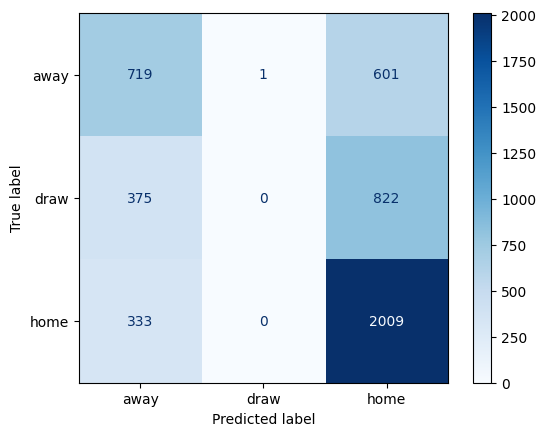

In [89]:
plot_confusion_matrix(lm, X_test, y_test, cmap='Blues')  
plt.show()

In [90]:
lm.predict_proba(X_test)

array([[0.52066139, 0.22409619, 0.25524242],
       [0.26213051, 0.28366596, 0.45420353],
       [0.13730809, 0.16877245, 0.69391946],
       ...,
       [0.50880598, 0.27293957, 0.21825445],
       [0.22669779, 0.29622771, 0.47707449],
       [0.1209965 , 0.23485033, 0.64415316]])

# Random_forest

In [91]:
X = data.drop('result_class', axis=1)
y = data['result_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
        'max_depth': trial.suggest_int('max_depth', 4, 10),
        'n_jobs': 10,
        'random_state': 42,
        'warm_start': trial.suggest_categorical('warm_start', [True, False]),
    }
    
    model = RandomForestClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_rf = optuna.create_study()
study_rf.optimize(objective, n_trials=20)

[I 2022-11-15 17:48:59,618] A new study created in memory with name: no-name-9893fdb5-efc3-4ca9-8f01-35f2db003705
[I 2022-11-15 17:49:00,927] Trial 0 finished with value: 0.5646090534979424 and parameters: {'n_estimators': 126, 'criterion': 'entropy', 'max_depth': 10, 'warm_start': True}. Best is trial 0 with value: 0.5646090534979424.
[I 2022-11-15 17:49:04,410] Trial 1 finished with value: 0.5646090534979424 and parameters: {'n_estimators': 750, 'criterion': 'entropy', 'max_depth': 4, 'warm_start': False}. Best is trial 0 with value: 0.5646090534979424.
[I 2022-11-15 17:49:09,165] Trial 2 finished with value: 0.5660493827160494 and parameters: {'n_estimators': 891, 'criterion': 'log_loss', 'max_depth': 5, 'warm_start': False}. Best is trial 0 with value: 0.5646090534979424.
[I 2022-11-15 17:49:10,200] Trial 3 finished with value: 0.5697530864197531 and parameters: {'n_estimators': 131, 'criterion': 'entropy', 'max_depth': 8, 'warm_start': True}. Best is trial 0 with value: 0.56460905

In [93]:
rf = RandomForestClassifier(**study_rf.best_params, n_jobs=10, random_state=42)

In [94]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=304,
                       n_jobs=10, random_state=42)

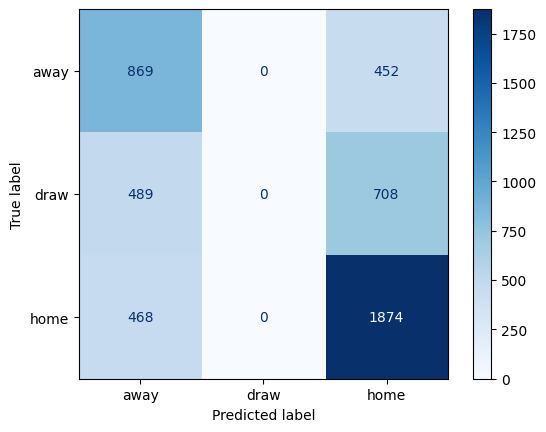

In [95]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues')  
plt.show()

In [96]:
rf.predict_proba(X_test)

array([[0.59893433, 0.21322893, 0.18783674],
       [0.20216301, 0.2679951 , 0.52984189],
       [0.09900076, 0.15611185, 0.7448874 ],
       ...,
       [0.48016422, 0.27064572, 0.24919006],
       [0.20113772, 0.26377694, 0.53508534],
       [0.12765578, 0.20676748, 0.66557673]])

In [97]:
accuracy_score(y_test, rf.predict(X_test))

0.56440329218107

# GradientBoosting

In [98]:
def objective(trial):
    param_grid = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_samples_split': trial.suggest_int('min_samples_split', 4, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 5),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'criterion': trial.suggest_categorical('criterion', ['friedman_mse', 'squared_error', 'mse']),
    }
    
    model = GradientBoostingClassifier(**param_grid)
    model.fit(X_train, y_train)
    
    return accuracy_score(y_test, model.predict(X_test))

study_gb = optuna.create_study()
study_gb.optimize(objective, n_trials=20)

[I 2022-11-15 17:50:26,028] A new study created in memory with name: no-name-30d2f362-85dc-4bc2-a681-4e76140d1359
[I 2022-11-15 17:50:43,762] Trial 0 finished with value: 0.5660493827160494 and parameters: {'n_estimators': 327, 'learning_rate': 0.09073480692091268, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 3, 'max_features': 'log2', 'criterion': 'mse'}. Best is trial 0 with value: 0.5660493827160494.
[I 2022-11-15 17:53:22,194] Trial 1 finished with value: 0.5594650205761317 and parameters: {'n_estimators': 699, 'learning_rate': 0.028684850151228628, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'mse'}. Best is trial 1 with value: 0.5594650205761317.
[I 2022-11-15 17:55:31,087] Trial 2 finished with value: 0.551440329218107 and parameters: {'n_estimators': 572, 'learning_rate': 0.04749317739333253, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_depth': 5, 'max_features': 'auto', 'criterion': 'squared_error'}. 

In [100]:
gb = GradientBoostingClassifier(**study_gb.best_params)

In [101]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='squared_error',
                           learning_rate=0.08081845360638713, max_depth=10,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=7, n_estimators=790)

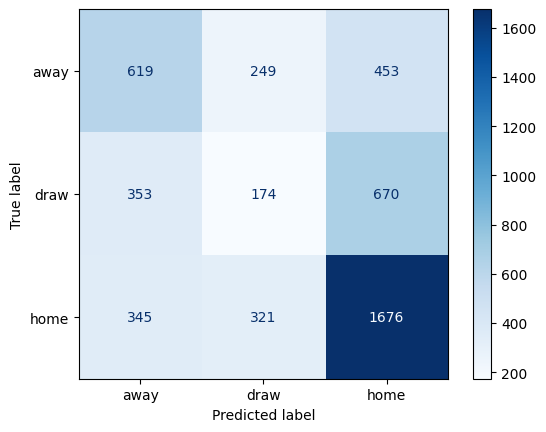

In [104]:
plot_confusion_matrix(gb, X_test, y_test, cmap='Blues')  
plt.show()

In [105]:
accuracy_score(y_test, gb.predict(X_test))

0.5080246913580246

# Catboost

In [298]:
from catboost import CatBoostClassifier

In [16]:
X = data.drop(['result_class', 'date'], axis=1).reset_index()
X['date'] = data.index.to_timestamp().year
y = data['result_class'].map({'home':2, 'draw':1, 'away':0})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

{'iterations': 998, 'learning_rate': 0.09951825897978678, 'depth': 8}

In [347]:
cb = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=10,loss_function='MultiClass')
cb.fit(X_train, y_train)

0:	learn: 1.0646232	total: 26.1ms	remaining: 26s
1:	learn: 1.0377736	total: 48ms	remaining: 24s
2:	learn: 1.0163018	total: 68.3ms	remaining: 22.7s
3:	learn: 0.9983602	total: 89.2ms	remaining: 22.2s
4:	learn: 0.9839615	total: 108ms	remaining: 21.6s
5:	learn: 0.9720120	total: 128ms	remaining: 21.3s
6:	learn: 0.9614904	total: 148ms	remaining: 21s
7:	learn: 0.9526865	total: 167ms	remaining: 20.8s
8:	learn: 0.9453629	total: 188ms	remaining: 20.6s
9:	learn: 0.9395086	total: 207ms	remaining: 20.5s
10:	learn: 0.9341308	total: 233ms	remaining: 20.9s
11:	learn: 0.9295616	total: 259ms	remaining: 21.4s
12:	learn: 0.9253497	total: 284ms	remaining: 21.5s
13:	learn: 0.9215409	total: 313ms	remaining: 22s
14:	learn: 0.9182658	total: 350ms	remaining: 23s
15:	learn: 0.9154753	total: 383ms	remaining: 23.6s
16:	learn: 0.9129161	total: 421ms	remaining: 24.4s
17:	learn: 0.9106136	total: 462ms	remaining: 25.2s
18:	learn: 0.9085569	total: 503ms	remaining: 26s
19:	learn: 0.9070097	total: 531ms	remaining: 26s
20

In [348]:
accuracy_score(y_test, cb.predict(X_test))

0.5351851851851852

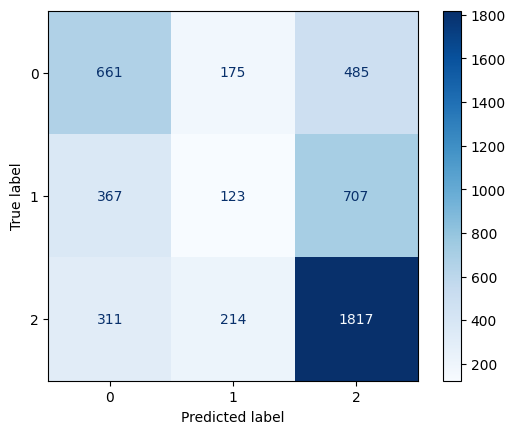

In [349]:
plot_confusion_matrix(cb, X_test, y_test, cmap='Blues')  
plt.show()

# NN

In [19]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader, random_split

from torchsummary import summary

from tqdm.notebook import tqdm

import torchvision.transforms as T
import torch.nn.functional as F
from torchvision.utils import make_grid
from torchvision.models import resnet50, ResNet50_Weights

from copy import deepcopy

In [17]:
X = data.drop('result_class', axis=1)
y = data['result_class']

scaler = RobustScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

n_features = X.shape[1]

In [20]:
dataset = TensorDataset(torch.Tensor(X.to_numpy()), 
                        torch.Tensor(y.map({'home':0, 'draw':1, 'away':2}).to_numpy()))

In [21]:
train_ds, valid_ds = random_split(dataset, (22297, 2000))

In [22]:
train_loader = DataLoader(train_ds, shuffle=True, batch_size=64)
valid_loader = DataLoader(valid_ds, shuffle=True, batch_size=64)

In [23]:
def plot_loss_metrics(tl: list, vl: list, tm: list, vm: list):

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    ax[0].plot(tl, label='Train loss')
    ax[0].plot(vl, label='Valid Loss')
    ax[0].legend()
    ax[0].set_title('Loss')

    ax[1].plot(tm, label='Train accuracy')
    ax[1].plot(vm, label='Valid accuracy')
    ax[1].legend()
    ax[1].set_title('Accuracy')

In [116]:
model = nn.Sequential(
    nn.Linear(n_features, 9),
    nn.Dropout(),
    nn.Linear(9, 9),
    nn.Dropout(),
    nn.Linear(9, 3),
    nn.Softmax(dim=1),
)

summary(model, (n_features, ), batch_size=128)
history = None

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 9]              90
           Dropout-2                   [128, 9]               0
            Linear-3                   [128, 9]              90
           Dropout-4                   [128, 9]               0
            Linear-5                   [128, 3]              30
           Softmax-6                   [128, 3]               0
Total params: 210
Trainable params: 210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [117]:
optimizer = optim.Adam(model.parameters())
# optimizer = optim.SGD(model.parameters(), lr=0.01) 
criterion = nn.CrossEntropyLoss()

In [118]:
def train_model(model, epochs, history=None):
    history = history or {
        'train_accs': [],
        'train_losses': [],
        'test_accs': [],
        'test_losses': [],
    }
    
    max_acc = 0
    
    start_epoch = len(history['train_accs'])
    for epoch in range(start_epoch+1, start_epoch+epochs+1):
        # print(f'{"-"*13} Epoch {epoch} {"-"*13}')
        print('=', end='')
        
        model.train()
        batch_accs = []
        batch_losses = [] 
        for x_train_batch, y_train_batch in train_loader: 
            y_train_batch = y_train_batch.type(torch.LongTensor)
            y_pred = model(x_train_batch)
            loss = criterion(y_pred, y_train_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_train_batch).numpy().mean())
            
        history['train_accs'].append(np.mean(batch_accs))
        history['train_losses'].append(np.mean(batch_losses))

        # Validation
        model.eval()
    
        batch_accs = []
        batch_losses = []
        for x_test_batch, y_test_batch in valid_loader:
            y_test_batch = y_test_batch.type(torch.LongTensor)
            y_pred = model(x_test_batch)
            loss = criterion(y_pred, y_test_batch)
            
            batch_losses.append(loss.item())
            batch_accs.append((y_pred.argmax(axis=1) == y_test_batch).numpy().mean())
            
        history['test_accs'].append(np.mean(batch_accs))
        history['test_losses'].append(np.mean(batch_losses))
        
        if np.mean(batch_losses) > max_acc:
            max_acc = np.mean(batch_losses)
            best_model = deepcopy(model)
    print('100%')                            
    return history

In [125]:
history = train_model(model, 500, history)

====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================100%


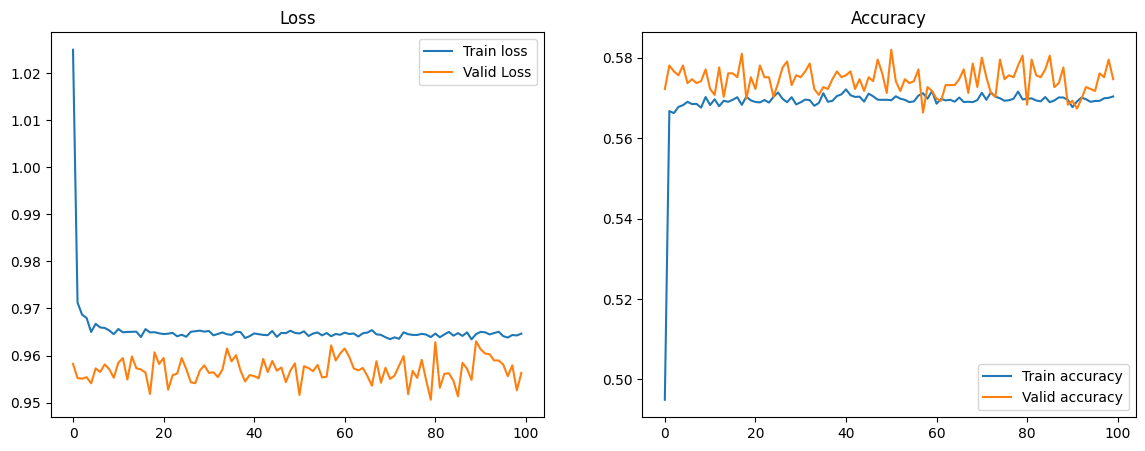

In [123]:
plot_loss_metrics(history['train_losses'], history['test_losses'], history['train_accs'], history['test_accs'])

In [124]:
model.eval()
pred = model(valid_ds.dataset.tensors[0]).argmax(axis=1)
print((pred == valid_ds.dataset.tensors[1]).numpy().mean())
confusion_matrix(pred.tolist(), valid_ds.dataset.tensors[1].tolist())

0.5714697287730995


array([[9649, 3567, 2581],
       [   0,    0,    0],
       [2090, 2174, 4236]])